## Imports, functions

In [23]:
import sys
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
import numpy as np

from lib.io_functions  import open_run_var,open_runs_table,do_run_things
from lib.cut_functions import VARsAsDataFrame


def evd(EV,RUN,WEEK,channels=None,RAW=False,compress=False):
    SAMPLING=4#in ns

    path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
    Runs=open_runs_table("../macros/"+WEEK+".xlsx")
    RunProps=Runs[Runs["Run"]==RUN].iloc[0]
    run_path=path+"run"+str(RunProps["Run"]).zfill(2)+"/";
    
    if channels is None: channels=RunProps["Channels"]; #use all
    else: channels=np.array(channels)
    
    Nchans=len(channels)
    Ncols=int((Nchans+1)/2)
    Nrows=int((Nchans)/2)
    
    
    if RAW:fig, axs = plt.subplots(dpi=200,ncols= Ncols,nrows=Nrows,figsize=[8,3],sharex=True)
    else  :fig, axs = plt.subplots(dpi=200,ncols= Ncols,nrows=Nrows,figsize=[8,3],sharex=True,sharey=True)
    # One channel at a time: 
    z=0;
    for ch in channels:
        i=int(z/Ncols)
        j=z%Ncols
        ADC          =open_run_var(run_path,"RawADC"       ,[ch],compressed=True)
        Pedestal_vars=open_run_var(run_path,"Pedestal_vars_SW",[ch],compressed=compress)
        
        ped    = Pedestal_vars[ch]["MEAN"][EV]
        pedSTD = Pedestal_vars[ch]["STD" ][EV]
        axs[i][j].tick_params(axis='both', which='major', labelsize=5)
        axs[i][j].grid()
        NBINS=ADC[ch][EV].shape[0]
        xrange=np.arange(NBINS)*SAMPLING
        if RAW:
            axs[i][j].plot( xrange,  ADC[ch][EV],linewidth=.5 )
            axs[i][j].plot([0, xrange[-1]], [ped,ped],                   color="tab:red"  ,linewidth=.7)
            axs[i][j].plot([0, xrange[-1]], [ped+pedSTD,ped+pedSTD],"--",color="tab:red"  ,linewidth=.7)
            axs[i][j].plot([0, xrange[-1]], [ped-pedSTD,ped-pedSTD],"--",color="tab:red"  ,linewidth=.7)
        else:
            axs[i][j].plot(xrange,(ADC[ch][EV]-ped)*RunProps["Polarity"][ch],linewidth=.5 )
            axs[i][j].plot([0, xrange[-1]], [0,0],                   color="tab:red"  ,linewidth=.7)
            axs[i][j].plot([0, xrange[-1]], [+pedSTD,+pedSTD],"--",color="tab:red"  ,linewidth=.7)
            axs[i][j].plot([0, xrange[-1]], [-pedSTD,-pedSTD],"--",color="tab:red"  ,linewidth=.7)

            axs[i][j].set_ylim([-30,30])
            axs[i][j].set_xlim([0,10000])
            axs[i][j].legend([RunProps["ChannelName"][z]],fontsize=7,loc='upper right')

        del Pedestal_vars,ADC
        z+=1;
    axs[0] [0].set_ylabel("Amplitude [ADCs]")
    axs[-1][0].set_xlabel("Time [ns]")
    plt.suptitle("Event:"+str(EV)+", Run: "+str(RUN), fontsize=10)

    if Nchans%2==1:axs[-1, -1].axis('off')
    plt.show()

def evd_single(EV,RUN,WEEK,ch,RAW=False,compress=False):
    SAMPLING=4#in ns

    path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
    Runs=open_runs_table("../macros/"+WEEK+".xlsx")
    RunProps=Runs[Runs["Run"]==RUN].iloc[0]
    run_path=path+"run"+str(RunProps["Run"]).zfill(2)+"/";
    
    
    fig, axs=plt.subplots(dpi=100,figsize=[6,3])
    ADC          =open_run_var(run_path,"RawADC"       ,[ch],compressed=True)
    Pedestal_vars=open_run_var(run_path,"Pedestal_vars_SW",[ch],compressed=compress)
    
    ped    = Pedestal_vars[ch]["MEAN"][EV]
    pedSTD = Pedestal_vars[ch]["STD" ][EV]
    axs.tick_params(axis='both', which='major', labelsize=5)
    axs.grid()
    NBINS=ADC[ch][EV].shape[0]
    xrange=np.arange(NBINS)*SAMPLING
    if RAW:
        axs.plot( xrange,  ADC[ch][EV],linewidth=1.5 )
        axs.plot([0, xrange[-1]], [ped,ped],                   color="tab:red"  ,linewidth=.7)
        axs.plot([0, xrange[-1]], [ped+pedSTD,ped+pedSTD],"--",color="tab:red"  ,linewidth=.7)
        axs.plot([0, xrange[-1]], [ped-pedSTD,ped-pedSTD],"--",color="tab:red"  ,linewidth=.7)
    else:
        axs.plot(xrange,(ADC[ch][EV]-ped)*RunProps["Polarity"][ch],linewidth=.5 )
        axs.plot([0, xrange[-1]], [0,0],                   color="tab:red"  ,linewidth=.7)
        axs.plot([0, xrange[-1]], [+pedSTD,+pedSTD],"--",color="tab:red"    ,linewidth=.7)
        axs.plot([0, xrange[-1]], [-pedSTD,-pedSTD],"--",color="tab:red"    ,linewidth=.7)
        axs.set_ylim([-30,30])
        axs.set_xlim([0,10000])
        axs.legend([RunProps["ChannelName"][z]],fontsize=7,loc='upper right')

    del Pedestal_vars,ADC
    axs.set_ylabel("Amplitude [ADCs]")
    axs.set_xlabel("Time [ns]")
    plt.suptitle("Event:"+str(EV)+", Run: "+str(RUN), fontsize=10)
    return axs


----------
Opening:  RawADC  channel: 5  ,in: /scr/neutrinos/rodrigoa/DAPHNE_VIS/joython/run28/RawADC_ch5.npz
----------
Opening:  Pedestal_vars_SW  channel: 5  ,in: /scr/neutrinos/rodrigoa/DAPHNE_VIS/joython/run28/Pedestal_vars_SW_ch5.npy


(3500.0, 8500.0)

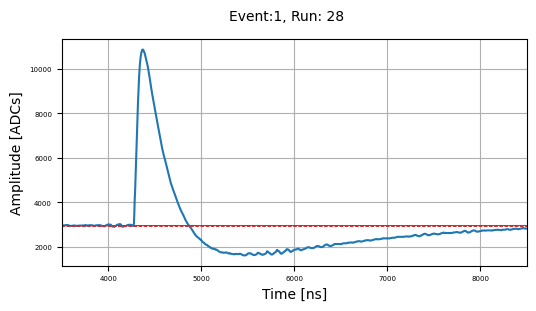

In [27]:
%matplotlib ipympl
%matplotlib inline

axs=evd_single(EV=1,RUN=28,WEEK="DAPHNE_VIS",ch=5,RAW=True)
axs.set_xlim([3500,8500])

## Actual things

In [3]:

run=9
ev =0

path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VIS/joython/"
Runs=open_runs_table("../macros/APSAIA_VIS.xlsx")
RunProps=Runs[Runs["Run"]==run].iloc[0]
run_path=path+"run"+str(RunProps["Run"]).zfill(2)+"/";
NEV=open_run_var(run_path,"Timestamp",[ch],compressed=False)[ch].shape[0]

Pedestal_vars=open_run_var(run_path,"Pedestal_vars_SW",RunProps["Channels"],compressed=False)
# plt.figure()
# plt.hist(Pedestal_vars[0]["STD"],100,[0,20]);
# plt.semilogy()
# plt.show()
pd=VARsAsDataFrame((Pedestal_vars,))
bads=pd.index[pd["STD"][0]>13].to_list()
# bads=pd.index[pd["Min"][1]<15400].to_list()
bads

[]

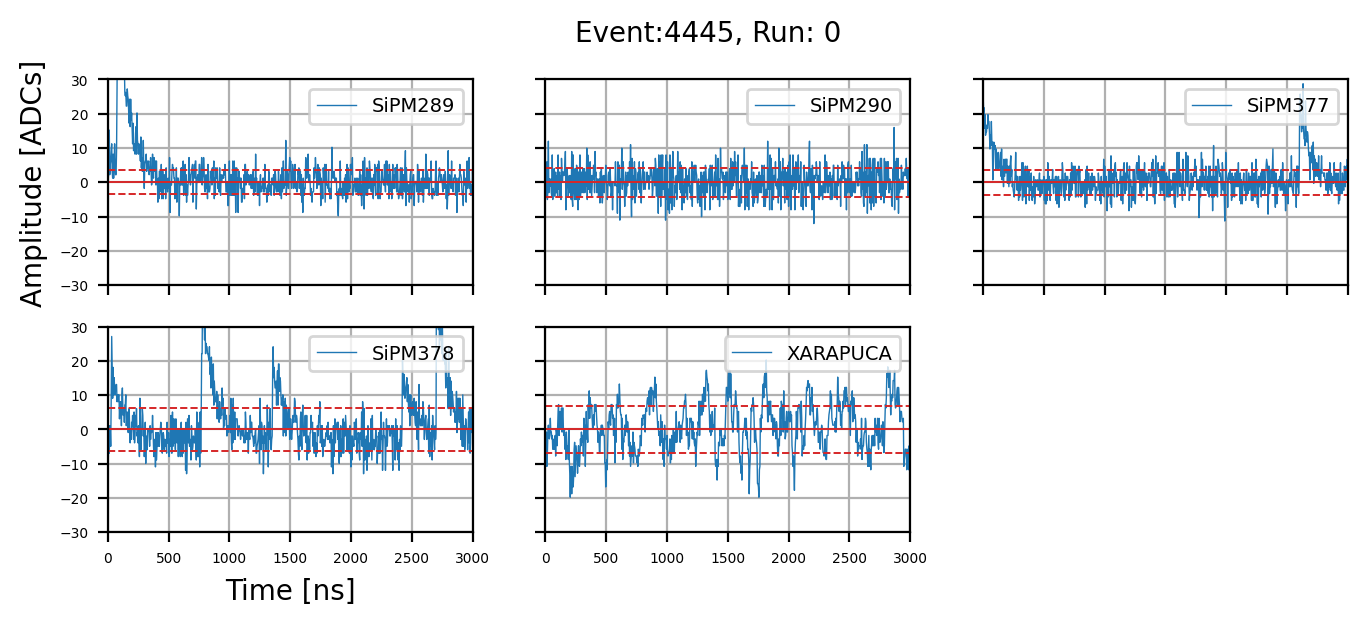

In [6]:
# for bad in bads:
for bad in [4445]:
    evd(bad,run)

227065.10250000044 222136.44155302978
226985.0362500004 222088.20430592453
226786.07375000042 221906.30202341432
226465.87625000038 221528.3672043344
225944.07750000036 221004.81545007168
225391.07125000036 220043.1216875843
224664.97750000033 218991.27378010793
223841.1187500003 218091.080721702
222810.3637500003 217108.7755253952
221832.5925000003 216100.04440081064
220567.26375000027 215133.48629006618
219302.64000000025 213440.02989983314
217909.20750000022 212139.16359934135
216589.9062500002 210829.0992662417
214822.38625000019 209687.5050189676
213371.12875000018 208647.70212987254
211632.16625000015 207403.97462438417
209884.05625000014 204239.0238675363
207925.09375000015 201444.94877555233
206326.35000000012 198890.32954628475
204860.50250000012 195895.44709555307
202966.9062500001 193763.2761781316
201309.4412500001 191809.6086354423
199849.68125000008 190506.75643406663
198325.92125000007 189308.28479202263
196614.11750000005 188204.6565154904
195065.59250000006 187209.4173

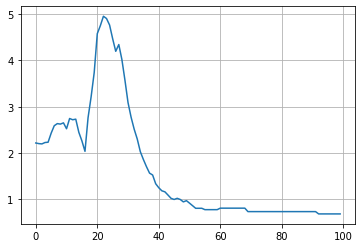

In [273]:
adc_ped      = (ADC         -np.mean(ADC         [:800]))
adc_filt_ped = (ADC_filtered-np.mean(ADC_filtered[:800]))
# plt.plot(adc_ped)
# plt.plot(adc_filt_ped)
plt.grid()

aux=[]
rng=range(0,100)
for i in rng:
    print(np.sum(adc_ped[adc_ped>i]),np.sum(adc_filt_ped[adc_filt_ped>i]))
    aux.append((np.sum(adc_ped[adc_ped>i])/np.sum(adc_filt_ped[adc_filt_ped>i])      -1)*100)
plt.plot(rng,aux)

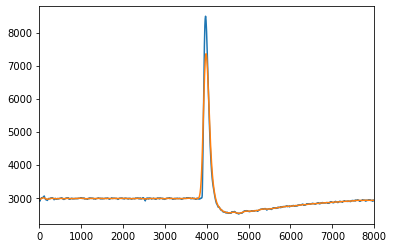

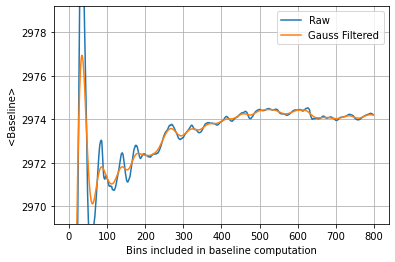

In [282]:
%matplotlib inline
from scipy.ndimage import gaussian_filter1d
ADC_filtered=gaussian_filter1d(ADC.astype(float),10)

plt.plot(np.arange(5000)*4,ADC)
plt.plot(np.arange(5000)*4,ADC_filtered)
plt.xlim([0,8e3])
plt.show()

aux=[]
aux2=[]
aux=[]
aux2=[]
for i in range(1,800):
    aux.append(np .mean(ADC[:i]))
    aux2.append(np.mean(ADC_filtered[:i]))
    
    # aux.append( np.std(ADC[:i]))
    # aux2.append(np.std(ADC_filtered[:i]))
    
    # aux.append( np.std(ADC[:i])         -np.std(ADC[:(i-1)]))
    # aux2.append(np.std(ADC_filtered[:i])-np.std(ADC_filtered[:(i-1)]))
    # aux.append( np.mean(ADC[:i])         -np.mean(ADC[:(i-1)]))
    # aux2.append(np.mean(ADC_filtered[:i])-np.mean(ADC_filtered[:(i-1)]))
aux=np.array(aux)
aux2=np.array(aux2)
plt.figure()
plt.plot(abs(aux))
plt.plot(abs(aux2))
plt.ylim([aux2[-1]-5,aux2[-1]+5])
plt.ticklabel_format(style="plain")

plt.xlabel("Bins included in baseline computation")
plt.ylabel("<Baseline>")
plt.legend(["Raw","Gauss Filtered"])
plt. grid()
# plt.semilogy()

[]

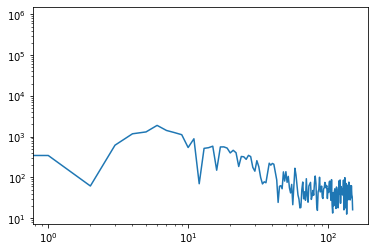

In [271]:
ch=-1;
ADC=open_run_var(run_path,"RawADC",[RunProps["Channels"][ch]],compressed=True)[RunProps["Channels"][ch]][bads[0]]
wvf_F=np.fft.rfft(ADC[0:300])
plt.plot(np.abs(wvf_F))
plt.semilogx()
plt.semilogy()

In [90]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt
# Create/view notch filter
ADC_filtered=gaussian_filter1d(ADC.astype(float),4)
print(np.std(ADC_filtered      [:100]))

aux=[]
for i in np.arange(0.1,6,0.001):
# for i in [0.40700000000000025]:
    samp_freq  = 250  # Sample frequency (Hz)
    notch_freq = i # Frequency to be removed from signal (Hz)
    quality_factor = 100# Quality factor
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)

    y_notched = signal.filtfilt(b_notch, a_notch, ADC_filtered)
    aux.append(np.std(y_notched[:100]))

plt.plot(ADC          [:4000])
plt.plot(ADC_filtered [:4000])
plt.plot(y_notched    [:4000])
print(np.arange(0.1,6,0.001)[np.argmin(np.array(aux))],aux[np.argmin(np.array(aux))])


3.729380441483535
0.6640000000000005 3.185495844192898


## Notch filter

(1000,) (1000,)


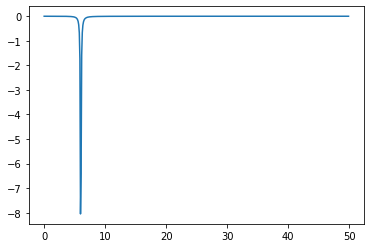

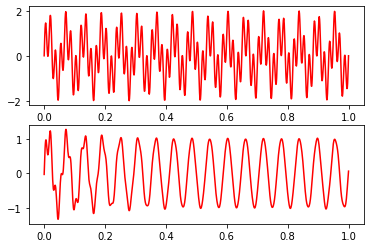

In [109]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Create/view notch filter
samp_freq = 100  # Sample frequency (Hz)
notch_freq = 6.0  # Frequency to be removed from signal (Hz)
quality_factor = 30.0  # Quality factor
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
freq, h = signal.freqz(b_notch, a_notch, fs = samp_freq)
plt.figure('filter')
plt.plot( freq, 20*np.log10(abs(h)))

# Create/view signal that is a mixture of two frequencies
f1 = 17
f2 = 60
t = np.linspace(0.0, 1, 1_000)
y_pure = np.sin(f1 * 2.0*np.pi*t) + np.sin(f2 * 2.0*np.pi*t) 
plt.figure('result')
plt.subplot(211)
plt.plot(t, y_pure, color = 'r')

# apply notch filter to signal
y_notched = signal.filtfilt(b_notch, a_notch, y_pure)

# plot notch-filtered version of signal
plt.subplot(212)
plt.plot(t, y_notched, color = 'r')

print(y_pure.shape,y_notched.shape)